In [1]:
from pathlib import Path
import json
import os
import requests
from time import sleep

# def start_session(email,password):
#     s = requests>Session()
#     s.auth = (email,password)
#     r = s.post('https://api.worldquantbrain.com/authentication')
def start_session(username, password):
    s = requests.Session()
    s.auth = (username, password)

    while True:
        try:
            # Send a POST request to the /authentication API
            response = s.post('https://api.worldquantbrain.com/authentication')
            response.raise_for_status()  # Raises an HTTPError if the status is 4xx, 5xx
            break
        except Exception as e:
            print(f"Connection down, trying to login again: {e}")
            sleep(10)

    print(response)
    return s
    

In [2]:
username = "wanqidu@link.cuhk.edu.cn"
password = "worldquant159753"

s = start_session(username, password)

<Response [201]>


In [3]:
import random
volatility = [
    "pv27_alpha_100w", "pv27_alpha_24m", "pv27_alpha_60m", "pv27_alpha_day_1y", "pv27_alpha_day_2y",
 "pv28_alpha_101w", "pv28_alpha_96m", "pv28_alpha_132m", "pv28_alpha_day_3y", "pv28_alpha_day_4y",
 "pv29_alpha_102w", "pv29_alpha_168m", "pv29_alpha_204m", "pv29_alpha_day_5y", "pv29_alpha_day_6y",
 "pv27_as_dq_adjclose", "pv27_as_dq_avgprice", "pv27_as_dq_change", "pv28_as_dq_adjclose",
 "pv28_as_dq_avgprice", "pv28_as_dq_change", "pv29_as_dq_adjclose", "pv29_as_dq_avgprice", "pv29_as_dq_change",
 "pv27_as_wq_avgpctchange100",
    "pv27_as_wq_devpctchange100",
    "pv27_as_wq_varpctchange100",
    "pv27_ashare_alpha_100w",
    "pv27_ashare_alpha_24m",
    "pv27_ashare_alpha_60m",
    "pv27_ashare_alpha_day_1y",
    "pv27_ashare_alpha_day_2y",
    "pv27_ashare_std_deviation_100w",
    "pv27_ashare_std_deviation_24m",
    "pv27_ashare_std_deviation_60m",
    "pv27_ashare_variance_100w",
    "pv27_ashare_variance_24m",
    "pv27_ashare_variance_60m","pv27_s_dq_pctchange",
    "pv27_s_mq_devpctchange24",
    "pv27_s_mq_devpctchange60",
    "pv27_s_wq_devpctchange100",
    "pv27_std_deviation_100w",
    "pv27_std_deviation_24m",
    "pv27_std_deviation_60m",
    "pv27_variance_100w",
    "pv27_variance_24m",
    "pv27_variance_60m",
    "pv27_s_risk_betar24",
    "pv27_s_risk_betar60",
    "pv27_s_risk_betar100","mdl122_6351_rp",
    "mdl122_alpha60m",
    "mdl122_betasigma",
    "mdl122_chg6malpha18m",
    "mdl122_chgalpha12m",
    "mdl122_chgalpha36m",
    "mdl122_chgars",
    "mdl122_chginvavgast",
    "mdl122_chgvolpre4y",
    "mdl122_cogsinvt",
    "mdl122_coreepsp",
    "mdl122_covol",
    "mdl122_d41isr",
    "mdl122_dtsm1_rd","mdl122_sigma",
    "mdl122_sigma_60d",
    "mdl122_volpre6m","mdl14_0101f",
    "mdl14_0120f",
    "mdl14_1300f",
    "mdl14_anaem_ana_em_sco",
    "mdl14_anaem_ana_em_sco2","mdl14_d1_accrual1_score",
    "mdl14_d1_f0010_chg_score",
    "mdl14_d1_f0020_chg_score",
    "mdl14_d1_f0040_chg_score",
    "mdl14_d1_ghc_0100f",
    "mdl14_d1_ghc_0200f",
    "mdl14_d1_ghc_0400f","mdl14_d1_f0010_chg_rank",
    "mdl14_d1_f0020_chg_rank",
    "mdl14_d1_f0040_chg_rank",
    "mdl14_frcst_anaem_f0020_rank",
    "mdl14_frcst_anaem_f0030_rank",
    "mdl14_frcst_anaem_f0040_rank",
 ]
volatility2 = [ # Alpha衡量
    "pv27_alpha_100w", "pv27_alpha_24m", "pv27_alpha_60m", "pv27_alpha_day_1y", "pv28_alpha_101w",
    # 平均价格变化和百分比变化
    "pv27_as_dq_avgprice", "pv27_as_dq_change", "pv28_as_dq_avgprice", "pv28_as_dq_change", "pv29_as_dq_avgprice",
    # 标准差和方差
    "pv27_std_deviation_100w", "pv27_std_deviation_24m", "pv27_std_deviation_60m", "pv27_variance_100w", "pv27_variance_24m",
    # 模型评估 - Alpha变化与排名
    "mdl14_0101f", "mdl14_0120f", "mdl14_1300f", "mdl14_anaem_ana_em_sco", "mdl14_anaem_ana_em_sco2",
    # 模型评估 - 模型排名
    "mdl14_rank_eq_idu_d1_0010f", "mdl14_rank_eq_idu_d1_0100f", "mdl14_rank_eq_idu_d1_0110f", "mdl14_rank_eq_idu_d1_0200f", "mdl14_rank_eq_idu_d1_0210f"
    "mdl122_alpha60m",
    "mdl122_betasigma",
    "mdl122_chg6malpha18m",
    "mdl122_chgalpha12m",
    "mdl122_chgalpha36m",
    "mdl122_chgars",
    "mdl122_chginvavgast",
    "mdl122_chgvolpre4y",
    "mdl122_cogsinvt",
    "mdl122_coreepsp",
    "mdl122_covol",
    "mdl122_d41isr",
    "mdl122_dtsm1_rd","mdl122_sigma",
    "mdl122_sigma_60d",
    "mdl122_volpre6m",
]

volume = [
    "pv27_volume_w", "pv28_volume_w", "pv29_volume_w", "pv27_as_block_amount", "pv27_as_block_frequency",
 "pv27_as_block_volume", "pv28_as_block_amount", "pv28_as_block_frequency", "pv28_as_block_volume",
 "pv29_as_block_amount", "pv29_as_block_frequency", "pv29_as_block_volume", "pv27_as_dq_amount",
 "pv28_as_dq_amount", "pv29_as_dq_amount","pv27_as_wq_turn",
    "pv27_ashare_amount_m",
    "pv27_ashare_amount_w",
    "pv27_ashare_turnover_d",
    "pv27_ashare_turnover_d_float",
    "pv27_ashare_turnover_m",
    "pv27_ashare_turnover_m_ave",
    "pv27_ashare_turnover_m_ave_float",
    "pv27_ashare_turnover_m_float",
    "pv27_ashare_turnover_w",
    "pv27_ashare_turnover_w_ave",
    "pv27_ashare_turnover_w_ave_float",
    "pv27_ashare_turnover_w_float",
    "pv27_ashare_volume_m",
    "pv27_ashare_volume_w","pv27_s_dq_volume",
    "pv27_s_dq_turn",
    "pv27_s_dq_freeturnover",
    "pv27_s_mq_turn",
    "pv27_s_wq_turn",
    "pv27_turnover_d",
    "pv27_turnover_d_float",
    "pv27_turnover_m",
    "pv27_turnover_m_ave",
    "pv27_turnover_m_ave_float",
    "pv27_turnover_m_float",
    "pv27_turnover_w",
    "pv27_turnover_w_ave",
    "pv27_turnover_w_ave_float",
    "pv27_turnover_w_float",
    "pv27_volume_m",
    "pv27_volume_w","mdl122_ccacw",
    "mdl122_cvvolp20d",
    "mdl122_cws",
    "mdl122_chgvolpre4y",
    "mdl122_covol",
    "mdl122_dcc",
    "mdl122_era","mdl122_sigma",
    "mdl122_sigma_60d",
    "mdl122_volpre6m","mdl14_2_d1_net_asset",
    "mdl14_2_d1_net_profit_t",
    "mdl14_2_d1_net_profit_t1",
    "mdl14_2_d1_net_profit_t2",
    "mdl14_2_d1_net_profit_t3",
    "mdl14_2_d1_rating",
    "mdl14_2_d1_target_price",
    "mdl14_2_d1_target_price_max",
    "mdl14_2_d1_target_price_min",
    "mdl14_2_d1_target_price_space",
    "mdl14_2gva_tse",
    "mdl14_2mtf_gva_tse",
    "mdl14_2mun_tse",
    "mdl14_2ocs_me_tse",
    "mdl14_2tw_gva_tse",
    "mdl14_2vc_tse",
    "mdl14_3gva_tse",
    "mdl14_3mtf_gva_tse",
    "mdl14_3mun_tse",
    "mdl14_3tw_gva_tse",
    "mdl14_3vc_tse",
    "mdl14_4gva_tse",
    "mdl14_4mtf_gva_tse",
    "mdl14_4mun_tse",
    "mdl14_4tw_gva_tse",
    "mdl14_4vc_tse",
    "mdl14_d1_capitalization","mdl14_eq_idu_d1_0510f",
    "mdl14_eq_idu_d1_0610f",
    "mdl14_eq_idu_d1_0710f",
    "mdl14_frcst_0100f",
    "mdl14_frcst_0200f",
    "mdl14_frcst_0300f",
    "mdl14_eq_idu_d1_0510f",
    "mdl14_eq_idu_d1_0610f",
    "mdl14_eq_idu_d1_0710f",
    "mdl14_frcst_0100f",
    "mdl14_frcst_0200f",
    "mdl14_rank_eq_idu_d1_0010f",
    "mdl14_rank_eq_idu_d1_0110f",
    "mdl14_rank_eq_idu_d1_0500f",
 ]
volume2 = [
    # 交易量
    "pv27_volume_w", "pv28_volume_w", "pv29_volume_w", "pv27_as_dq_amount", "pv28_as_dq_amount", "pv29_as_dq_amount",
    # 个股和市场的交易量和换手率
    "pv27_s_dq_volume", "pv27_s_dq_turn", "pv27_s_dq_freeturnover", "pv27_s_mq_turn", "pv27_s_wq_turn",
    # 个股和市场的平均交易量和换手率
    "pv27_as_wq_turn", "pv27_as_wq_freeturnover", "pv27_as_mq_turn", "pv27_as_wq_turn", "pv27_as_wq_freeturnover",
    # 模型评估 - 模型排名与评分
    "mdl14_eq_idu_d1_0510f", "mdl14_eq_idu_d1_0610f", "mdl14_eq_idu_d1_0710f", "mdl14_frcst_0100f", "mdl14_frcst_0200f",
    # 模型评估 - 模型排名与评分（重复以满足至少6个）
    "mdl14_rank_eq_idu_d1_0010f", "mdl14_rank_eq_idu_d1_0110f", "mdl14_rank_eq_idu_d1_0500f", "mdl14_eq_idu_d1_0510f", "mdl14_eq_idu_d1_0610f", "mdl14_eq_idu_d1_0710f"
    "mdl122_cvvolp20d",
    "mdl122_cws",
    "mdl122_chgvolpre4y",
    "mdl122_covol",
    "mdl122_dcc",
    "mdl122_era","mdl122_sigma",
    "mdl122_sigma_60d",
    "mdl122_volpre6m","mdl14_2_d1_net_asset","pv27_sell_volume_small_order","pv27_volume_diff_small_trader","pv27_sell_volume_med_order","pv27_s_li_initiativebuyamount"
    ,"pv27_buy_volume_large_order","pv27_buy_volume_small_order","pv27_sell_volume_large_order"
]
pv = [
    "opt4_122_call_pre_delta20","opt4_122_call_pre_delta35",
    "opt4_122_call_pre_delta40","opt4_122_call_pre_delta45",
    "opt4_122_call_pre_delta60","opt4_122_call_pre_delta65",
    "opt4_122_call_pre_delta80","opt4_122_call_pre_delta75",
    "opt4_122_put_pre_delta20","opt4_122_put_pre_delta30",
    "opt4_122_put_pre_delta40","opt4_122_put_pre_delta50",
    "opt4_122_put_pre_delta60","opt4_122_put_pre_delta70",
    "opt4_122_put_pre_delta80","opt4_152_put_pre_delta20",
    "opt4_152_put_pre_delta30","opt4_152_put_pre_delta40",
    "opt4_152_call_pre_delta20","opt4_152_call_pre_delta30",
    "opt4_152_call_pre_delta40","opt4_152_call_pre_delta50",
    "opt4_152_call_pre_delta60","opt4_152_call_pre_delta70",
    "opt4_152_call_pre_delta80","opt4_152_call_pre_delta55",
]

d = ["1","5","10","20","60","120","220","30","30"] # 这个就是random choice 的池子

tichun = ["ts_regression", "regression_neut","vector_neut","group_vector_neut","ts_corr","ts_co_kurtosis","ts_co_skewness"]

fenzubijiao = ["group_neutralize","group_normalize","group_rank","group_scale","group_zscore"]

grouping = ["bucket(rank(cap), range = '0,1,0.1')","bucket(rank(assets),range = '0,1,0.1')","bucket(rank(vec_sum(pv27_ashare_beta_100w)),range = '0,1,0.1')"]

known_factors = ["bucket(rank(cap), range = '0,1,0.1')","bucket(rank(assets),range = '0,1,0.1')","bucket(rank(vec_sum(pv27_ashare_beta_100w)),range = '0,1,0.1')"]

vec = ["vec_sum","vec_avg","vec_max","vec_min"]

std = ["ts_std_dev","ts_av_diff"," ts_max_diff"," ts_min_diff"]

grouping.extend(known_factors)

genos = {
    1:d,
    2:volatility2,
    3:volume2,
    4:vec,
    5:grouping,
    6:tichun,
    7:fenzubijiao,
    8:fenzubijiao,
    9:d,
    10:grouping,
}

def choose_random_from_genos(genos):
    selected = {}
    for key,value in genos.items():
        selected[key] = random.choice(value) #choose a random value for each genos
    return selected

num_combinations = 1

for value in genos.values():
    num_combinations *= len(value)
print(f"there could be {num_combinations} combinations")

random_selection = choose_random_from_genos(genos)

random_selection

there could be 3510864000 combinations


{1: '5',
 2: 'mdl14_rank_eq_idu_d1_0200f',
 3: 'mdl122_covol',
 4: 'vec_sum',
 5: "bucket(rank(assets),range = '0,1,0.1')",
 6: 'ts_co_skewness',
 7: 'group_scale',
 8: 'group_rank',
 9: '60',
 10: "bucket(rank(cap), range = '0,1,0.1')"}

In [4]:
def create_piece_1(random_selection):#tichun(option_var, css, d) fenzubijiao(ts_std_dev(vec(i),d)/ts_mean(vec(i),d),group)
    
    piece_1_result = None
    
    mapping_info = []
    # genos = { 这里的random_selection 的索引就对应这genos里的了 因为提纯中不同的运算符格式不一样所以得加条件判断，还是很好理解的
    # 1:d,
    # 2:css,
    # 3:option_var,
    # 4:pv,
    # 5:grouping,
    # 6:tichun,
    # 7:tichun,
    # 8:fenzubijiao
    # }
#     genos = { 你的
#     1:d,
#     2:volatility2,
#     3:volume2,
#     4:vec,
#     5:grouping,
#     6:tichun, tichun = ["ts_regression", "regression_neut","vector_neut","group_vector_neut","ts_corr","ts_co_kurtosis","ts_co_skewness"]
#     7:fenzubijiao,
#     8:fenzubijiao,
#     9:d, std改成d算了
    # 10：grouping
# } fenzubijiao(ts_std_dev(vec(i),d)/ts_mean(vec(i),d),group)  fenzubijiao = ["group_neutralize","group_normalize","group_rank","group_scale","group_zscore"]
    
    piece_1_result = random_selection[7]+"("+"ts_std_dev("+ random_selection[4]+ "("+ random_selection[2]+")"+","+random_selection[1]+\
        ")/ ts_mean("+ random_selection[4]+ "("+ random_selection[2]+")"+","+random_selection[1]+"),"+ random_selection[5]+")"
    mapping_info = [7,4,2,1,4,2,1,5]
        
    
    
    return piece_1_result, mapping_info

def create_piece_2(random_selection,piece_1):# -tichun(pv,piece_1,d) new -tichun(piece_1,B) B = std(returns,d) 这里的d应该是与上面要相同的！
    
    piece_2_result = None
    
    mapping_info = []
    
    if "ts_" in random_selection[6]:
        piece_2_result = "-"+random_selection[6]+"("+piece_1+","+"ts_std_dev(returns,"+ random_selection[1]+")," + random_selection[1]+")"
        mapping_info = [6,1,1]
        
    elif "group_" in random_selection[6]:
        piece_2_result = "-"+random_selection[6]+"("+piece_1+","+"ts_std_dev(returns,"+ random_selection[1]+")," + random_selection[5]+")"
        mapping_info = [6,1,5]
        
    else:
        piece_2_result = "-"+random_selection[6]+"("+piece_1+","+"ts_std_dev(returns,"+ random_selection[1]+")"+")"
        mapping_info = [6,1]
    
    return piece_2_result, mapping_info

def create_piece_3(random_selection): #fenzubijiao(-piece_2,grouping) fenzubijiao(ts_std_dev(vec(i),d)/ts_mean(vec(i),d),group) 换一个group好了 还要换一个d

    piece_3_result = random_selection[7]+"("+"-ts_std_dev("+ random_selection[4]+ "("+ random_selection[3]+")/"+"sharesout,"+random_selection[9]+\
        ")/ ts_mean("+ random_selection[4]+ "("+ random_selection[3]+")/"+"sharesout,"+random_selection[9]+"),"+ random_selection[10]+")"
    mapping_info = [7,4,3,9,4,3,9,10]
    return piece_3_result, mapping_info

def create_piece_4(random_selection,piece_2,piece_3): #fenzubijiao(-piece_2,grouping) new  trade_when(condition,piece_2+piece_3,-1)
    piece_4_result = "trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,"+ piece_2 +"+"+ piece_3 + ",-1)"
   

    return piece_4_result
    

def create_piece(random_selection):
    piece_1_result, mapping_info_1 = create_piece_1(random_selection)
    piece_2_result, mapping_info_2 = create_piece_2(random_selection,piece_1_result)
    piece_3_result, mapping_info_3 = create_piece_3(random_selection)
    piece_4_result = create_piece_4(random_selection,piece_2_result,piece_3_result)

    return (piece_4_result,[random_selection,{1:mapping_info_1, 2:mapping_info_2, 3:mapping_info_3}])

In [5]:
create_piece(random_selection)

("trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-ts_co_skewness(group_scale(ts_std_dev(vec_sum(mdl14_rank_eq_idu_d1_0200f),5)/ ts_mean(vec_sum(mdl14_rank_eq_idu_d1_0200f),5),bucket(rank(assets),range = '0,1,0.1')),ts_std_dev(returns,5),5)+group_scale(-ts_std_dev(vec_sum(mdl122_covol)/sharesout,60)/ ts_mean(vec_sum(mdl122_covol)/sharesout,60),bucket(rank(cap), range = '0,1,0.1')),-1)",
 [{1: '5',
   2: 'mdl14_rank_eq_idu_d1_0200f',
   3: 'mdl122_covol',
   4: 'vec_sum',
   5: "bucket(rank(assets),range = '0,1,0.1')",
   6: 'ts_co_skewness',
   7: 'group_scale',
   8: 'group_rank',
   9: '60',
   10: "bucket(rank(cap), range = '0,1,0.1')"},
  {1: [7, 4, 2, 1, 4, 2, 1, 5], 2: [6, 1, 1], 3: [7, 4, 3, 9, 4, 3, 9, 10]}])

生成第一批Alpha 并传送至simulate

In [6]:
#randomly do 100 random_selections and save the result into a dictionary
# if the key is already in the dictionary, the skip it
#if the key is not in the dictionary, then save the key and values into the dictionary
result_dict = {}

while len(result_dict)<200:
    random_selection = choose_random_from_genos(genos)

    # piece_1, mapping_info_1 = create_piece_1(random_selection)

    # piece_2, mapping_info_2 = create_piece_2(random_selection, piece_1)

    # piece_3, mapping_info_3 = create_piece_3(random_selection, piece_2)
    piece_1, mapping_info_1 = create_piece_1(random_selection)
    piece_2, mapping_info_2 = create_piece_2(random_selection,piece_1)
    piece_3, mapping_info_3 = create_piece_3(random_selection)
    piece_4 = create_piece_4(random_selection,piece_2,piece_3)

    if piece_4 in result_dict: #piece 指的就是最终返回的
        continue
    else:
        result_dict[piece_4] = [random_selection,{1:mapping_info_1, 2:mapping_info_2, 3:mapping_info_3}]

In [7]:
import csv

with open("alpha.csv", "w", newline = "") as csvfile:

    fieldnames = ["alpha", "random_selection", "mapping_info", "id","is"]

    writer = csv.DictWriter(csvfile, fieldnames = fieldnames)

    writer.writeheader()

    for key,value in result_dict.items():
        writer.writerow({"alpha":key, "random_selection": value[0], "mapping_info":value[1]})

In [8]:
simulation_data = {
    'type': 'REGULAR',
    'settings': {
        'instrumentType': 'EQUITY',#这里两个不知道为什么顺序不一样 错的是很多顺序都不一样
        'region': 'CHN',
        'universe': 'TOP3000',
        'delay': 1,
        'decay': 5,
        'neutralization': 'SECTOR',
        'truncation': 0.08,
        'pasteurization': 'ON',
        'unitHandling': 'VERIFY',
        'nanHandling': 'ON',
        'language': 'FASTEXPR',
        'visualization': False,
    },
    'regular': ""
}

alpha_list = []

for key,value in result_dict.items():

    simulation_data["regular"] = key #填写了regular

    alpha_list.append(simulation_data.copy())


In [9]:
from time import sleep

while len(alpha_list)>0:

    simulation_data = alpha_list.pop()
    running = True
    while running:

        try:
            simulation_progress_url = s.post('https://api.worldquantbrain.com/simulations', json=simulation_data).headers["Location"]

            running = False
        except:
            sleep(5)

            print(simulation_data["regular"])

            print("Error occured, Sleeping for 5 seconds")

sleep(15)

trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-ts_co_kurtosis(group_normalize(ts_std_dev(vec_max(mdl122_cogsinvt),5)/ ts_mean(vec_max(mdl122_cogsinvt),5),bucket(rank(cap), range = '0,1,0.1')),ts_std_dev(returns,5),5)+group_normalize(-ts_std_dev(vec_max(pv27_as_wq_turn)/sharesout,10)/ ts_mean(vec_max(pv27_as_wq_turn)/sharesout,10),bucket(rank(assets),range = '0,1,0.1')),-1)
Error occured, Sleeping for 5 seconds
trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-ts_co_kurtosis(group_normalize(ts_std_dev(vec_max(mdl122_cogsinvt),5)/ ts_mean(vec_max(mdl122_cogsinvt),5),bucket(rank(cap), range = '0,1,0.1')),ts_std_dev(returns,5),5)+group_normalize(-ts_std_dev(vec_max(pv27_as_wq_turn)/sharesout,10)/ ts_mean(vec_max(pv27_as_wq_turn)/sharesout,10),bucket(rank(assets),range = '0,1,0.1')),-1)
Error occured, Sleeping for 5 seconds
trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-ts_co_kurtosis(group_normalize(ts_std_dev(vec_max(mdl122_cogsinvt),5)/ ts_mean(vec_max(mdl122_cogsinvt),5),buc

从IS列表获取结果

In [10]:
username = "wanqidu@link.cuhk.edu.cn"
password = "worldquant159753"

s = start_session(username, password)

<Response [201]>


In [11]:
def get_n_is_alphas(session, total_alphas, limit=100):
    fetched_alphas = []
    offset = 0
    #alphaNum = 0#我自己加的

    while len(fetched_alphas) < total_alphas:
        response = session.get(f"https://api.worldquantbrain.com/users/self/alphas?stage=IS&limit={limit}&offset={offset}")
        alphas = response.json()["results"]
        fetched_alphas.extend(alphas)
        #alphaNum += len(alphas)  # Count the total number of fetched alphas
        

        if len(alphas) < limit:
            break
        offset += limit

    return fetched_alphas[:total_alphas]

sim_result = get_n_is_alphas(s,200)

In [12]:
import csv

with open("alpha.csv", mode = "r") as infile:
    reader = csv.DictReader(infile)

    alpha_list = list(reader)
    # compare and update the csv data
    for sim in sim_result:
        alpha_expression = sim["regular"]["code"]

        for alpha in alpha_list:

            if alpha["alpha"] == alpha_expression:

                alpha["id"] = sim["id"]

                alpha["is"] = sim["is"]
# write the updated data back to CSV

with open("alpha.csv", mode = "w", newline="") as outfile:

    writer = csv.DictWriter(outfile, fieldnames= alpha_list[0].keys())

    writer.writeheader()

    writer.writerows(alpha_list)



确定第一轮的优化目标，暂定fitness和coverage

In [13]:
import ast

with open("alpha.csv", mode = "r") as infile:

    reader = csv.DictReader(infile)

    alpha_list = list(reader)

valid_dict = {}

for alpha in alpha_list:

    try:

        if ( ast.literal_eval(alpha["is"])["longCount"]+ ast.literal_eval(alpha["is"])["shortCount"]>500) and (abs(ast.literal_eval(alpha["is"])["fitness"]) > 0.3):

            valid_dict[alpha['alpha']] = [ast.literal_eval(alpha['random_selection']), ast.literal_eval(alpha['mapping_info'])]

    except:
        continue

num_valid = len(valid_dict)

print(f'there are {num_valid} valid alpha')


there are 58 valid alpha


选出符合标准的精英Alpha

In [14]:
if len(valid_dict) % 2 != 0:
    unpaired_element = valid_dict.popitem() # 只用pop一次就会变成偶数

items = list(valid_dict.items())

random.shuffle(items)

valid_dict = dict(items)

keys  = list(valid_dict.keys())#which is also the Alpha expression





交叉（片段）与（单点）变异

In [15]:
import random
import copy

def swap_dna_elements(dna1, dna2, level): #swap method
    mapping1 = dna1[1].get(level,[])
    mapping2 = dna2[1].get(level,[])

    dna1_copy = copy.deepcopy(dna1)

    dna2_copy = copy.deepcopy(dna2)

    for key in mapping1:
        dna2[0][key] = dna1_copy[0][key]

    for key in mapping2:
        dna1[0][key] = dna2_copy[0][key]
    
    dna1[1][level] = mapping2

    dna2[1][level] = mapping1

    return dna1, dna2

def mutate_dna_element(dna):

    dna_result = copy.deepcopy(dna)

    level_to_mutate = random.randint(1,8)

    dna_result[0][level_to_mutate] = random.choice(genos[level_to_mutate])

    return dna_result



In [17]:
batch2_list = []

pairs = [(keys[i], keys[i+1]) for i in range(0, len(keys),2)]

for pair in pairs:

    level_to_swap = random.randint(1,3)

    dna1 = valid_dict[pair[0]]

    dna2 = valid_dict[pair[1]]

    dna1, dna2 = swap_dna_elements(dna1,dna2,level_to_swap)

    dna1 = mutate_dna_element(dna1)

    dna2 = mutate_dna_element(dna2)

    batch2_list.append(dna1)

    batch2_list.append(dna2)

    # 填充至100个，已回测过的不再回测

    while len(batch2_list) <200:
        dna = random.choice(list(valid_dict.values()))

        dna = mutate_dna_element(dna)
        # check repeatability
        if dna not in batch2_list:

            batch2_list.append(dna)

            

    
    

In [18]:
batch2_dict = {}
for item in batch2_list:

    element = create_piece(item[0])

    batch2_dict[element[0]] = element[1]

将第二批Alpha传送至simulate

In [19]:
import csv

with open("alpha_batch2.csv", "w", newline = "") as csvfile:

    fieldnames = ["alpha", "random_selection", "mapping_info", "id","is"]

    writer = csv.DictWriter(csvfile, fieldnames = fieldnames)

    writer.writeheader()

    for key,value in batch2_dict.items():
        writer.writerow({"alpha":key, "random_selection": value[0], "mapping_info":value[1]})
        

In [20]:
simulation_data = {
    'type': 'REGULAR',
    'settings': {
        'instrumentType': 'EQUITY',#这里两个不知道为什么顺序不一样 错的是很多顺序都不一样
        'region': 'CHN',
        'universe': 'TOP3000',
        'delay': 1,
        'decay': 5,
        'neutralization': 'SECTOR',
        'truncation': 0.08,
        'pasteurization': 'ON',
        'unitHandling': 'VERIFY',
        'nanHandling': 'ON',
        'language': 'FASTEXPR',
        'visualization': False,
    },
    'regular': ""
}

alpha_list = []

for key,value in batch2_dict.items():

    simulation_data["regular"] = key #填写了regular

    alpha_list.append(simulation_data.copy())# 这里没有 但我觉得应该和上面一样 感觉这里相比前后少了一部分


In [21]:
from time import sleep

while len(alpha_list)>0:

    simulation_data = alpha_list.pop()
    running = True
    while running:

        try:
            simulation_progress_url = s.post('https://api.worldquantbrain.com/simulations', json=simulation_data).headers["Location"]

            running = False
        except:
            sleep(5)

            print(simulation_data["regular"])

            print("Error occured, Sleeping for 5 seconds")

sleep(15)

trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-group_vector_neut(group_scale(ts_std_dev(vec_min(pv27_std_deviation_100w),5)/ ts_mean(vec_min(pv27_std_deviation_100w),5),bucket(rank(cap), range = '0,1,0.1')),ts_std_dev(returns,5),bucket(rank(cap), range = '0,1,0.1'))+group_scale(-ts_std_dev(vec_min(mdl122_cws)/sharesout,10)/ ts_mean(vec_min(mdl122_cws)/sharesout,10),bucket(rank(cap), range = '0,1,0.1')),-1)
Error occured, Sleeping for 5 seconds
trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-group_vector_neut(group_scale(ts_std_dev(vec_min(pv27_std_deviation_100w),5)/ ts_mean(vec_min(pv27_std_deviation_100w),5),bucket(rank(cap), range = '0,1,0.1')),ts_std_dev(returns,5),bucket(rank(cap), range = '0,1,0.1'))+group_scale(-ts_std_dev(vec_min(mdl122_cws)/sharesout,10)/ ts_mean(vec_min(mdl122_cws)/sharesout,10),bucket(rank(cap), range = '0,1,0.1')),-1)
Error occured, Sleeping for 5 seconds
trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-group_vector_neut(group_scale(ts_std_dev(v

In [22]:
username = "wanqidu@link.cuhk.edu.cn"
password = "worldquant159753"

s = start_session(username, password)

<Response [201]>


从IS列表中获取结果2

In [23]:
def get_n_is_alphas(session, total_alphas, limit=100):
    fetched_alphas = []
    offset = 0
    #alphaNum = 0#我自己加的

    while len(fetched_alphas) < total_alphas:
        response = session.get(f"https://api.worldquantbrain.com/users/self/alphas?stage=IS&limit={limit}&offset={offset}")
        alphas = response.json()["results"]
        fetched_alphas.extend(alphas)
        #alphaNum += len(alphas)  # Count the total number of fetched alphas
        

        if len(alphas) < limit:
            break
        offset += limit

    return fetched_alphas[:total_alphas]

sim_result = get_n_is_alphas(s,200)

In [24]:
import csv

with open("alpha_batch2.csv", mode = "r") as infile:#改动应该只有文件名
    reader = csv.DictReader(infile)

    alpha_list = list(reader)
    # compare and update the csv data
    for sim in sim_result:
        alpha_expression = sim["regular"]["code"]

        for alpha in alpha_list:

            if alpha["alpha"] == alpha_expression:

                alpha["id"] = sim["id"]

                alpha["is"] = sim["is"]
# write the updated data back to CSV

with open("alpha_batch2.csv", mode = "w", newline="") as outfile:

    writer = csv.DictWriter(outfile, fieldnames= alpha_list[0].keys())

    writer.writeheader()

    writer.writerows(alpha_list)



确定第二轮的优化目标，暂定sharpe

In [25]:
import ast

with open("alpha.csv", mode = "r") as infile:

    reader = csv.DictReader(infile)

    alpha_list = list(reader)

valid_dict = {}

for alpha in alpha_list:
    try:

        if abs(ast.literal_eval(alpha["is"])["sharpe"]) > 0.5:
            valid_dict[alpha['alpha']] = [ast.literal_eval(alpha['random_selection']), ast.literal_eval(alpha['mapping_info'])]

    except:
        continue

num_valid = len(valid_dict)

print(f'there are {num_valid} valid alpha')


there are 70 valid alpha


选出符合标准的精英Alpha

In [26]:
if len(valid_dict) % 2 != 0:
    unpaired_element = valid_dict.popitem() # 只用pop一次就会变成偶数

    print(unpaired_element)

items = list(valid_dict.items())

random.shuffle(items)

valid_dict = dict(items)

keys  = list(valid_dict.keys())





交叉与变异2

In [27]:
batch3_list = []

pairs = [(keys[i], keys[i+1]) for i in range(0, len(keys),2)]

for pair in pairs:

    level_to_swap = random.randint(1,3)

    dna1 = valid_dict[pair[0]]

    dna2 = valid_dict[pair[1]]

    dna1, dna2 = swap_dna_elements(dna1,dna2,level_to_swap)

    dna1 = mutate_dna_element(dna1)

    dna2 = mutate_dna_element(dna2)

    batch3_list.append(dna1)

    batch3_list.append(dna2)

    # 填充至100个，已回测过的不再回测

    while len(batch3_list) <200:
        dna = random.choice(list(valid_dict.values()))

        dna = mutate_dna_element(dna)
        # check repeatability
        if dna not in batch3_list:

            batch3_list.append(dna)

            

    
    

In [28]:
batch3_dict = {}
for item in batch3_list:

    element = create_piece(item[0])

    batch3_dict[element[0]] = element[1]

In [29]:
len(batch3_dict)

259

将第三批Alpha传送至simulate

In [30]:
import csv

with open("alpha_batch3.csv", "w", newline = "") as csvfile:

    fieldnames = ["alpha", "random_selection", "mapping_info", "id","is"]

    writer = csv.DictWriter(csvfile, fieldnames = fieldnames)

    writer.writeheader()

    for key,value in batch3_dict.items():
        writer.writerow({"alpha":key, "random_selection": value[0], "mapping_info":value[1]})
        

In [31]:
simulation_data = {
    'type': 'REGULAR',
    'settings': {
        'instrumentType': 'EQUITY',#这里两个不知道为什么顺序不一样 错的是很多顺序都不一样
        'region': 'CHN',
        'universe': 'TOP3000',
        'delay': 1,
        'decay': 5,
        'neutralization': 'SECTOR',
        'truncation': 0.08,
        'pasteurization': 'ON',
        'unitHandling': 'VERIFY',
        'nanHandling': 'ON',
        'language': 'FASTEXPR',
        'visualization': False,
    },
    'regular': ""
}

alpha_list = []

for key,value in batch3_dict.items():

    simulation_data["regular"] = key #填写了regular

    alpha_list.append(simulation_data.copy())# 这里没有 但我觉得应该和上面一样


In [32]:
from time import sleep

while len(alpha_list)>0:

    simulation_data = alpha_list.pop()
    running = True
    while running:

        try:
        
            simulation_progress_url = s.post('https://api.worldquantbrain.com/simulations', json=simulation_data).headers["Location"]

            running = False
        except:
            sleep(5)

            print(simulation_data["regular"])

            print("Error occured, Sleeping for 5 seconds")

sleep(15)

trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-vector_neut(group_neutralize(ts_std_dev(vec_avg(mdl122_volpre6m),120)/ ts_mean(vec_avg(mdl122_volpre6m),120),bucket(rank(vec_sum(pv27_ashare_beta_100w)),range = '0,1,0.1')),ts_std_dev(returns,120))+group_neutralize(-ts_std_dev(vec_avg(pv27_buy_volume_small_order)/sharesout,20)/ ts_mean(vec_avg(pv27_buy_volume_small_order)/sharesout,20),bucket(rank(cap), range = '0,1,0.1')),-1)
Error occured, Sleeping for 5 seconds
trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-vector_neut(group_neutralize(ts_std_dev(vec_avg(mdl122_volpre6m),120)/ ts_mean(vec_avg(mdl122_volpre6m),120),bucket(rank(vec_sum(pv27_ashare_beta_100w)),range = '0,1,0.1')),ts_std_dev(returns,120))+group_neutralize(-ts_std_dev(vec_avg(pv27_buy_volume_small_order)/sharesout,20)/ ts_mean(vec_avg(pv27_buy_volume_small_order)/sharesout,20),bucket(rank(cap), range = '0,1,0.1')),-1)
Error occured, Sleeping for 5 seconds
trade_when(ts_rank(ts_std_dev(returns,10),252)<0.9,-vector_n

Result Analysis

In [33]:
genos = {
    1:d,
    2:volatility2,
    3:volume2,
    4:vec,
    5:grouping,
    6:tichun,
    7:fenzubijiao,
    8:fenzubijiao,
    9:d,
    10:grouping,
}

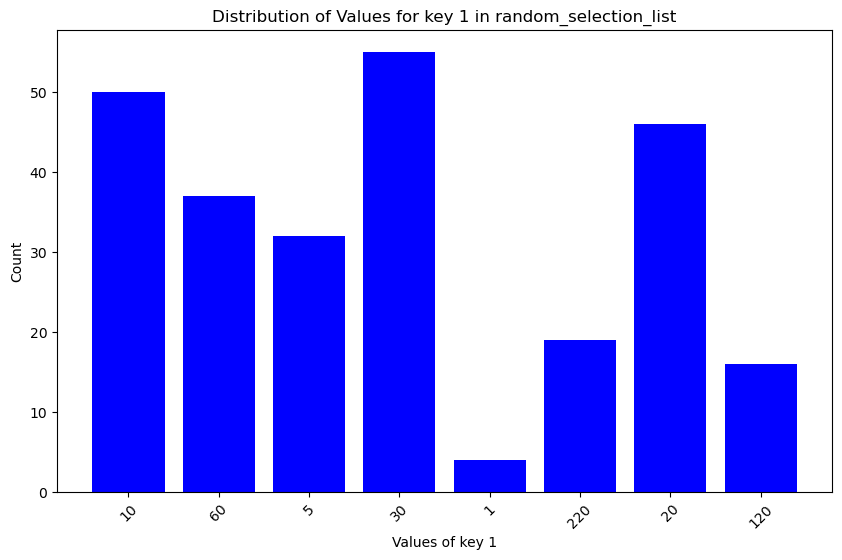

In [34]:
import csv

with open("alpha_batch3.csv", mode = "r") as infile:

    reader = csv.DictReader(infile)

    alpha_list = list(reader)
random_selection_list = []

for alpha in alpha_list:
    random_selection_list.append(alpha["random_selection"])

random_selection_list

import matplotlib.pyplot as plt
from collections import Counter

import ast

key_1_values = [ast.literal_eval(item)[1] for item in random_selection_list]

value_counts = Counter(key_1_values)

plt.figure(figsize = (10,6))

plt.bar(value_counts.keys(), value_counts.values(), color = "blue")

plt.xlabel("Values of key 1")

plt.ylabel("Count")

plt.title("Distribution of Values for key 1 in random_selection_list")

plt.xticks(rotation = 45)

plt.show()



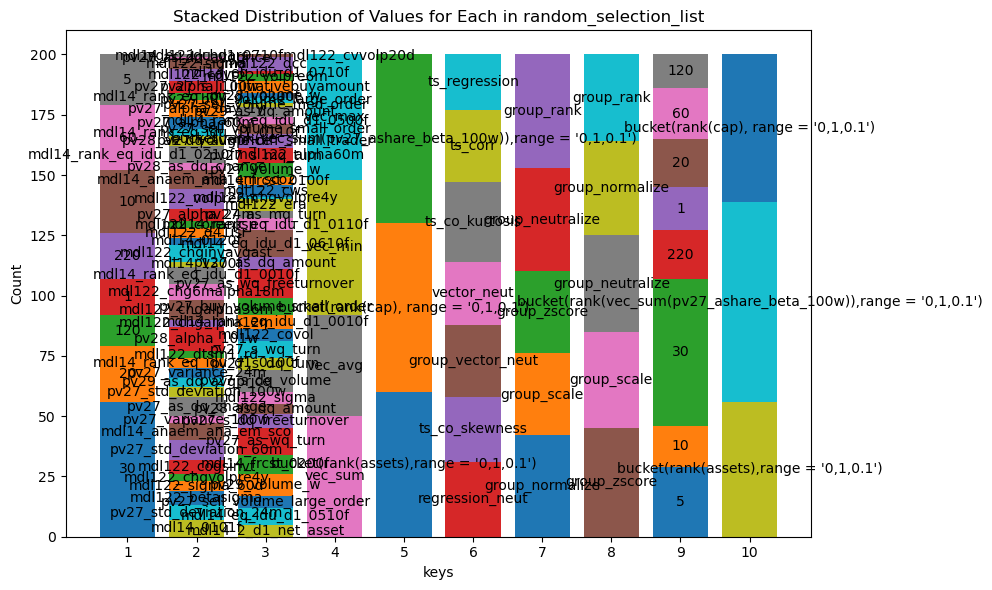

In [35]:
import matplotlib.pyplot as plt

from collections import Counter, defaultdict

import ast

import csv

with open("alpha.csv", mode = "r") as infile:
    
    reader = csv.DictReader(infile)

    alpha_list = [ast.literal_eval(item["random_selection"]) for item in reader]

value_counts_per_key = defaultdict(Counter)

for item in alpha_list:
    for key, value in item.items():

        value_counts_per_key[key][value] += 1

unique_keys = sorted(value_counts_per_key.keys())

base = {key: 0 for key in unique_keys}

plt.figure(figsize = (10,6))

for key in unique_keys:

    bottom = 0

    for value, count in value_counts_per_key[key].items():

        plt.bar([key],[count],bottom = [bottom], label = value)

        plt.text(key,bottom + count /2, str(value), ha = "center", va = 'center')

        bottom += count
plt.xlabel('keys')

plt.ylabel('Count')

plt.title('Stacked Distribution of Values for Each in random_selection_list')

plt.xticks(unique_keys)

plt.tight_layout()

plt.show()

